## Installing packages

In [2]:
%%writefile requirements.txt
tensorflow==2.17.0
keras==3.4.1
tensorflow-decision-forests==1.10.0
tensorflow-text==2.17.0
tf-keras==2.17.0

Writing requirements.txt


In [3]:
!pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 2.6 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 93.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 95.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 95.5 MB/s eta 0:00:00:00:01
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully uninstalled tensorflow-2.16.1
  Att

In [4]:
!pip install ImageHash
!pip install --upgrade albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.4/58.4 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.9/227.9 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 606.4/606.4 kB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 291.7/291.7 kB 16.0 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.17
    Uninstalling albucore-0.0.17:
      Successfully uninstalled albucore-0.0.17
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.17
    Uninstalling albumentations-1.4.17:
      Successfully uninstalled albumentations-1.4.17


In [5]:
!pip install albumentations opencv-python

## Importing

In [6]:
import tensorflow as tf
import keras
print(f"Tensorflow version -> {tf.__version__}")
print(f"Keras version -> {keras.__version__}")

2024-11-24 19:50:51.966078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 19:50:51.987628: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-11-24 19:50:51.994338: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Tensorflow version -> 2.17.0
Keras version -> 3.4.1


In [7]:
import numpy as np
from collections import Counter, defaultdict
import matplotlib.pyplot as plt
from keras import Sequential, layers, regularizers
from keras.utils import Sequence
from keras.applications.efficientnet import EfficientNetB3, preprocess_input
from keras.applications import EfficientNetB0
from keras.layers import GlobalAveragePooling2D, Dense, Lambda, Dropout, Conv2D, MaxPooling2D, Flatten, Rescaling, BatchNormalization, Input
from keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import imagehash
from PIL import Image
import cv2
import albumentations as A
from keras.optimizers import Adam
import keras_cv
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow_probability as tfp
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from keras.metrics import Precision, Recall
from keras.applications import ResNet152V2
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
# from keras.mixed_precision import set_global_policy
# from keras.mixed_precision import Policy, policy_scope

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')
# dataset_address = "/content/drive/MyDrive/Colab_Dataset/ANN_DL_2024-2025/training_set.npz"

dataset_address = "/kaggle/input/dataset/training_set.npz"

## Load Data

Loaded data - Images: (13759, 96, 96, 3), Labels: (13759, 1) 



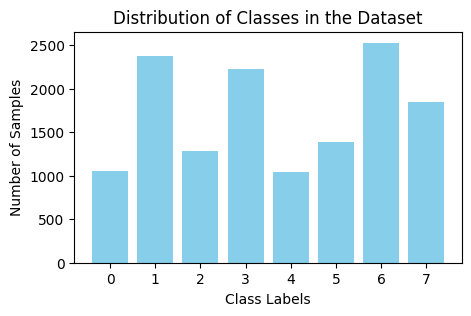

In [9]:
def load_data(dataset_address):
    data = np.load(dataset_address)
    X = data['images']
    y = data['labels']
    print(f"Loaded data - Images: {X.shape}, Labels: {y.shape} \n")
    return X, y
    
X, y = load_data(dataset_address)

def class_bar_chart(y):
  # Count the occurrences of each class in the labels
  unique_classes, class_counts = np.unique(y, return_counts=True)



  # Plot the bar chart
  plt.figure(figsize=(5, 3))
  plt.bar(unique_classes, class_counts, color='skyblue')
  plt.xlabel('Class Labels')
  plt.ylabel('Number of Samples')
  plt.title('Distribution of Classes in the Dataset')
  plt.xticks(unique_classes)  # Ensure class labels are shown on the x-axis
  plt.show()

class_bar_chart(y)

In [10]:
# Set random seeds for reproducibility
# np.random.seed(42)
# tf.random.set_seed(42)

## Preprocessing

### Initial Inspection of the images

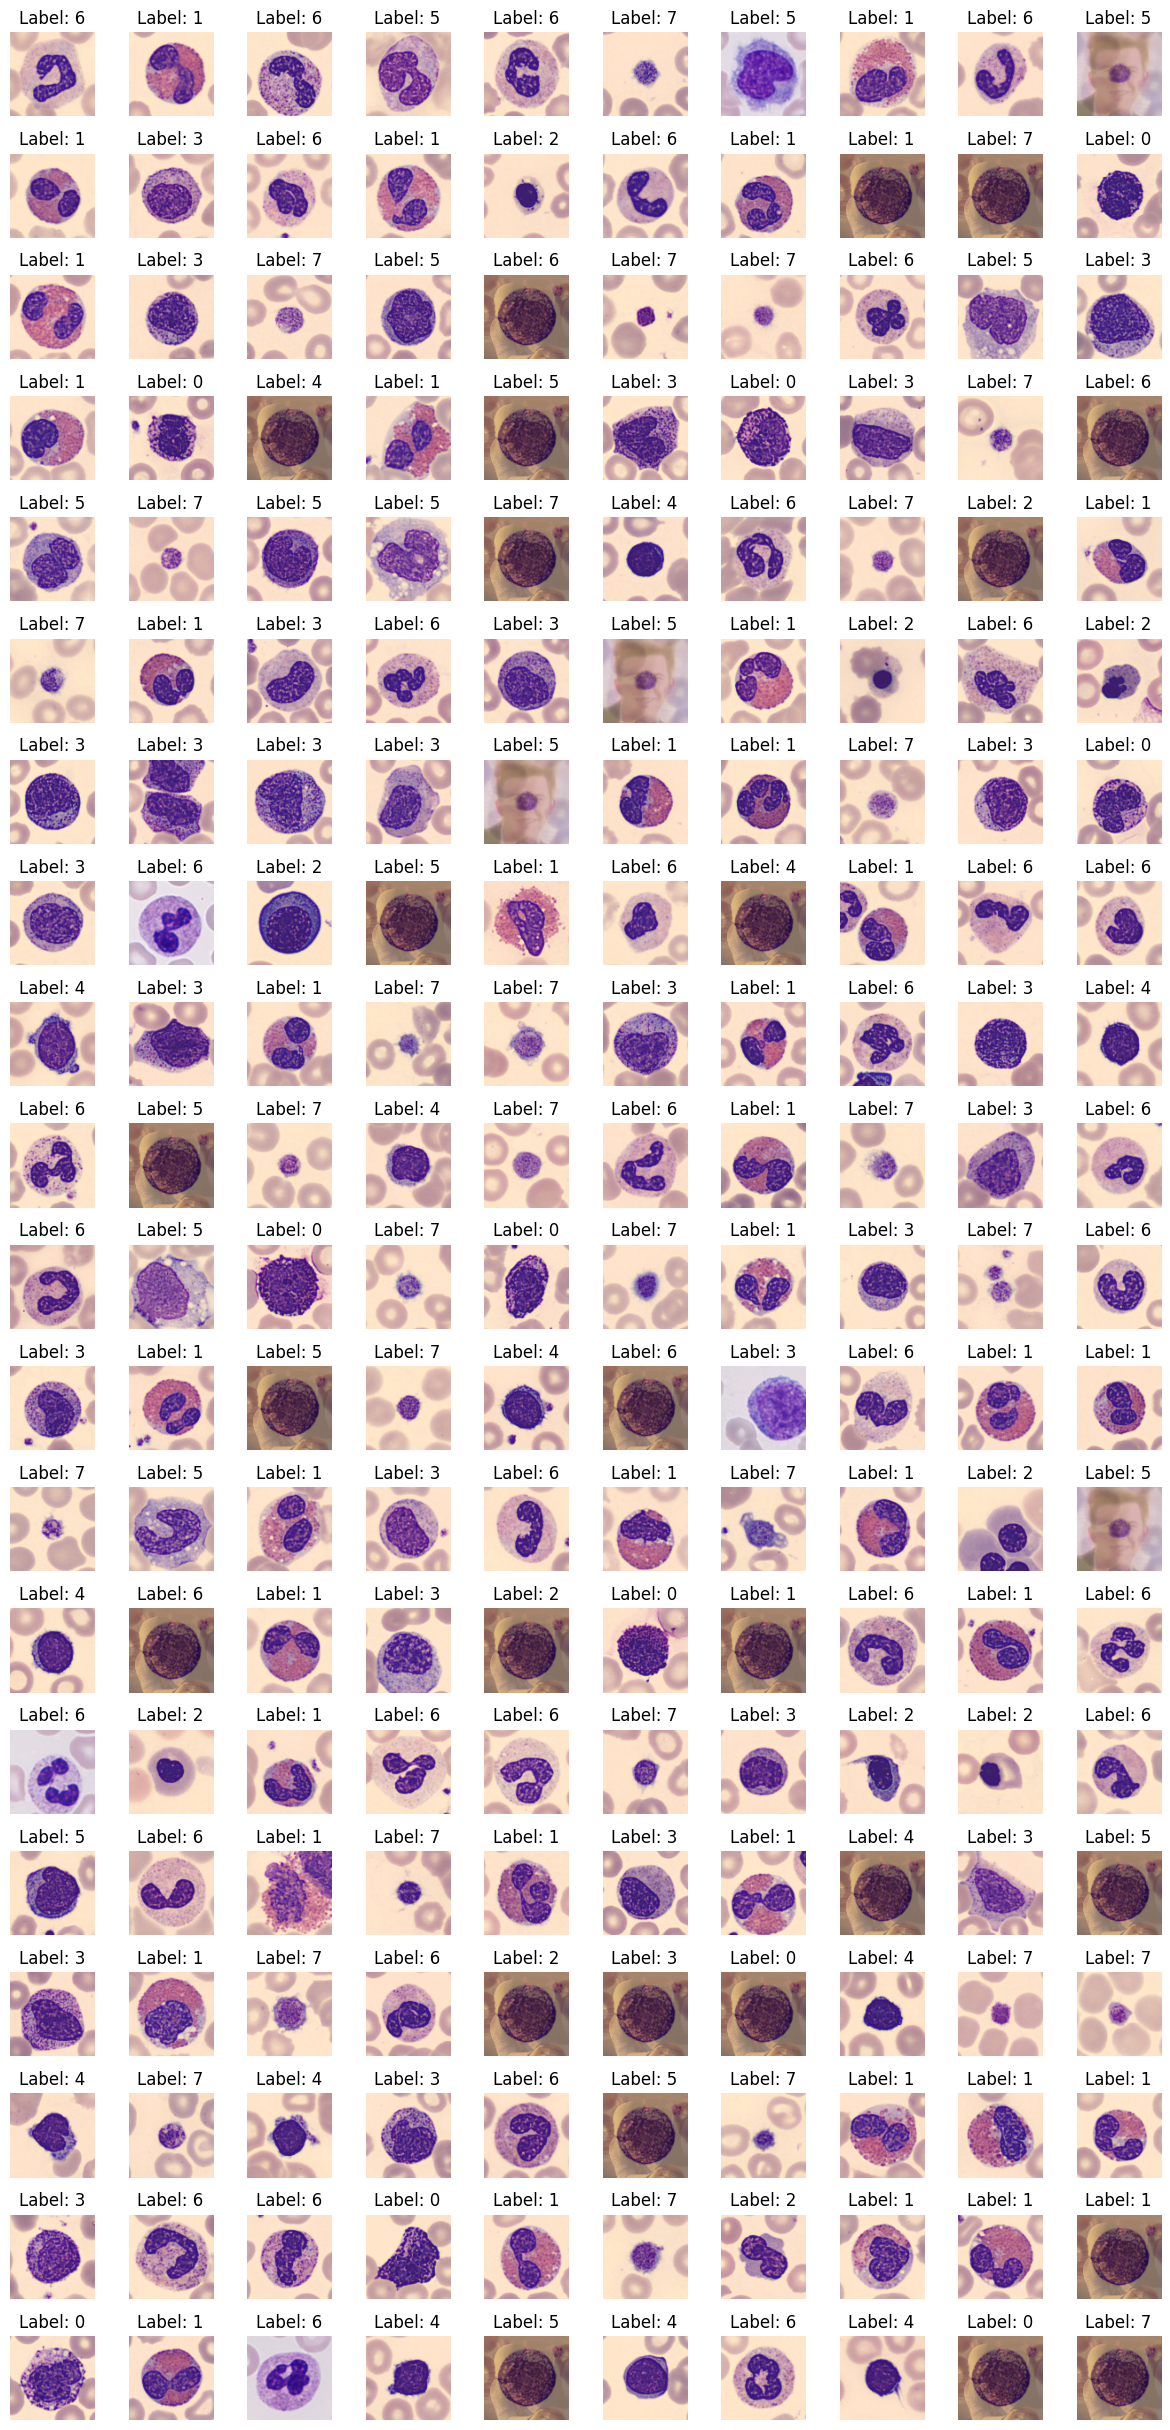

In [11]:
def display_random_images(images, labels, n, m):
    random_indices = np.random.choice(len(images), n * m, replace=False)
    fig, axes = plt.subplots(n, m, figsize=(m*1.2, n*1.22))
    axes = axes.flatten()
    for i, idx in enumerate(random_indices):
        axes[i].imshow(images[idx])
        axes[i].set_title(f"Label: {labels[idx][0]}")
        axes[i].axis('off') 
    plt.tight_layout()
    plt.show()

display_random_images(X, y, 20, 10)

### Removing duplicates

Data after removing duplicates: (11959, 96, 96, 3) 



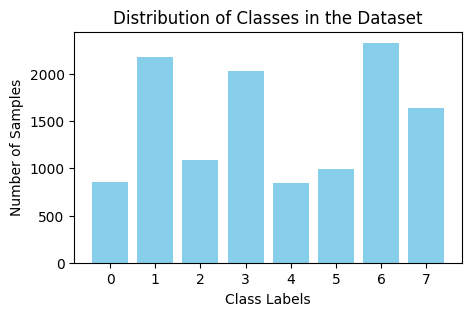

In [12]:
def compute_phash(image):
    pil_image = Image.fromarray(image)
    return imagehash.phash(pil_image)

def remove_duplicates(X, y):
    phash_dict = defaultdict(list)
    for idx, image in enumerate(X):
        image_phash = compute_phash(image)
        phash_dict[str(image_phash)].append(idx)

    to_remove = set()
    for indices in phash_dict.values():
        if len(indices) > 10:
            to_remove.update(indices)

    X_cleaned = np.delete(X, list(to_remove), axis=0)
    y_cleaned = np.delete(y, list(to_remove), axis=0)
    return X_cleaned, y_cleaned

X, y = remove_duplicates(X, y)
print(f"Data after removing duplicates: {X.shape} \n")

class_bar_chart(y)

So the data is imbalance!

## Checking for outliers

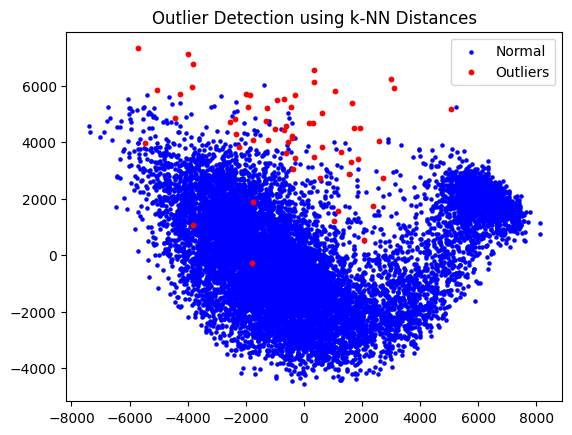

Detected outliers indices 
In Total: 60


In [13]:
# Assuming x_data is a list of images
# Step 1: Flatten images
def flatten_images(images):
    flattened = [img.flatten() for img in images]
    return np.array(flattened)

# Flatten the images
flattened_images = flatten_images(X)

# Step 2: Dimensionality reduction using PCA
pca = PCA(n_components=50)  # Reduce to 50 principal components
pca_features = pca.fit_transform(flattened_images)

# Step 3: k-NN based outlier detection
k = 150  # Number of neighbors
nbrs = NearestNeighbors(n_neighbors=k).fit(pca_features)
distances, _ = nbrs.kneighbors(pca_features)

# Calculate the average distance to k neighbors
avg_distances = distances.mean(axis=1)

# Identify outliers: points with distance above a threshold
threshold = np.percentile(avg_distances, 99.5)  # Top 5% considered outliers
outliers = np.where(avg_distances > threshold)[0]

# Step 4: Visualization
plt.scatter(pca_features[:, 0], pca_features[:, 1], c='blue', s=5, label='Normal')
plt.scatter(pca_features[outliers, 0], pca_features[outliers, 1], c='red', s=10, label='Outliers')
plt.title('Outlier Detection using k-NN Distances')
plt.legend()
plt.show()

print(f"Detected outliers indices \nIn Total: {len(outliers)}")

In [14]:
Counter(y[outliers].reshape(-1))

Counter({3: 17, 2: 12, 1: 10, 4: 7, 0: 6, 6: 5, 5: 3})

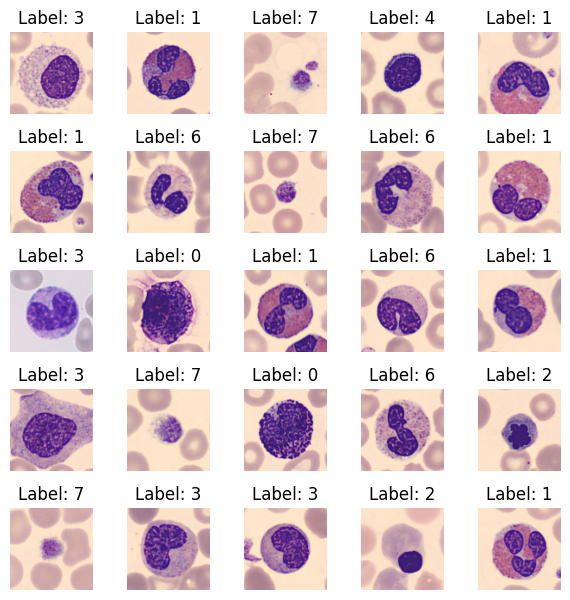

In [15]:
display_random_images(X, y, 5, 5)

### Plot random images

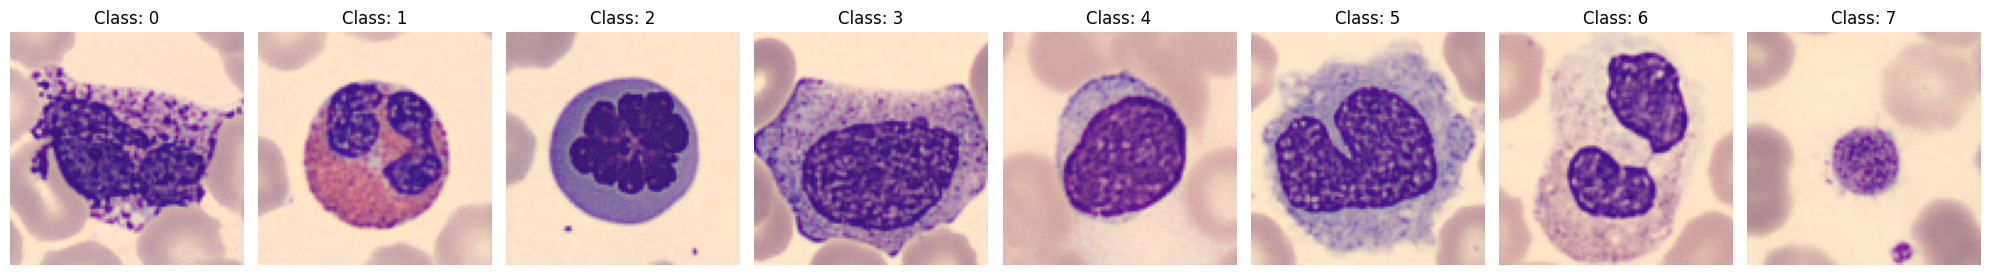

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def plot_random_images_one_per_class(images, labels, num_classes=8):
    plt.figure(figsize=(20, 5))
    plotted_classes = set()
    images_to_plot = []

    # Indices shuffled to pick random images
    shuffled_indices = np.random.permutation(len(images))

    # Find one random image for each class
    for i in shuffled_indices:
        label = labels[i][0]
        if label not in plotted_classes:
            images_to_plot.append((images[i], label))
            plotted_classes.add(label)
        if len(plotted_classes) == num_classes:
            break

    # Sort images by label to display them in order
    images_to_plot.sort(key=lambda x: x[1])

    # Plot images
    for idx, (img, lbl) in enumerate(images_to_plot):
        plt.subplot(1, num_classes, idx + 1)
        plt.imshow(img)
        plt.title(f"Class: {lbl}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Call the function using your data
plot_random_images_one_per_class(X, y, num_classes=8)


### Split data


Class distribution in Train Set:


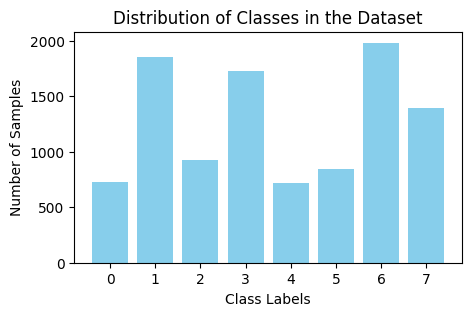


Class distribution in Validation Set:


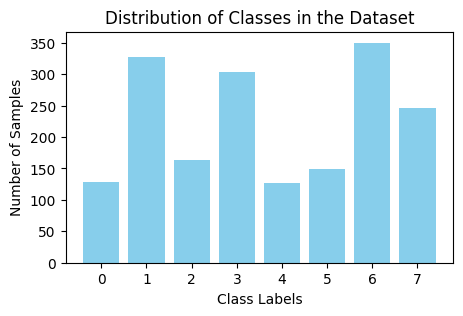

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.15, random_state=42)
print("\nClass distribution in Train Set:")
class_bar_chart(y_train)
print("\nClass distribution in Validation Set:")
class_bar_chart(y_val)

### Initial Augmentation (if needed)

In [18]:
# def augment_class(X_class, y_class, target_class, num_needed, datagen):
#     X_augmented, y_augmented = [], []
#     for X_batch, _ in datagen.flow(X_class, y_class, batch_size=32, shuffle=False):
#         X_augmented.append(X_batch)
#         y_augmented.extend([target_class] * len(X_batch))
#         if len(y_augmented) >= num_needed:
#             break

#     X_augmented = np.concatenate(X_augmented)[:num_needed]
#     y_augmented = np.array(y_augmented)[:num_needed]
#     return X_augmented, y_augmented

# def augment_data(X, y, target_count):

#     # Flatten y and convert to a list for Counter
#     y = np.ravel(y).tolist()

#     # Define the augmentation settings
#     datagen = ImageDataGenerator(
#         rotation_range=20,
#         width_shift_range=0.1,
#         height_shift_range=0.1,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         vertical_flip=True,
#         brightness_range=[0.8, 1.2]
#     )

#     new_X_list, new_y_list = [], []

#     for target_class, count in Counter(y).items():
#         if count < target_count:
#             print(f"Augmenting class {target_class}...")
#             class_indices = np.where(np.array(y) == target_class)[0]
#             X_class = X[class_indices]
#             y_class = np.array(y)[class_indices]

#             num_needed = target_count - len(X_class)

#             # Generate augmented data
#             X_augmented, y_augmented = augment_class(X_class, y_class, target_class, num_needed, datagen)

#             # Append new data to lists
#             new_X_list.append(X_augmented)
#             new_y_list.append(y_augmented)

#     # If new data was generated, concatenate with the original dataset
#     if new_X_list:
#         X_new = np.concatenate(new_X_list, axis=0)
#         y_new = np.concatenate(new_y_list, axis=0)
#         X = np.concatenate([X, X_new], axis=0)
#         y = np.concatenate([y, y_new], axis=0)

#     return X, y

In [19]:
# X_train, y_train = augment_data(X_train, y_train, 1200)
# X_val, y_val = augment_data(X_val, y_val, 200)

# print("\nClass distribution in Train Set:")
# class_bar_chart(y_train)

# print("\nClass distribution in Validation Set:")
# class_bar_chart(y_val)

### Compute class weights fot training process

In [20]:
y_train_flat = y_train.flatten()  # Convert from shape (n_samples, 1) to (n_samples,)
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_flat),
    y=y_train_flat
)
class_weights_dict = dict(enumerate(class_weights))

# Print or inspect the class weights dictionary
print("Class Weights:", class_weights_dict)

Class Weights: {0: 1.755006906077348, 1: 0.6853425026968716, 2: 1.3781182212581344, 3: 0.7378774680603949, 4: 1.7598684210526316, 5: 1.5054798578199051, 6: 0.641729797979798, 7: 0.9095382963493199}


### convert to categorical

In [21]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

### create a noisy version of validation data just for testing the accuracy at the end

In [22]:
X_val_copy = np.copy(X_val)
def add_white_noise(images, noise_level=25):
    noise = np.random.normal(loc=0, scale=noise_level, size=images.shape).astype(np.uint8)
    noisy_images = np.clip(images + noise, 0, 255)  # Clip to keep pixel values within valid range
    return noisy_images
    
X_val_noisy = add_white_noise(X_val_copy)

## Training

### Augmentation functions through training

In [ ]:
# Define RandAugment
rand_augment = keras_cv.layers.RandAugment(
    value_range=(0, 255),
    augmentations_per_image=2,
    magnitude=0.5
)

# Define AugMix
augmix = keras_cv.layers.AugMix(
    value_range=(0, 255),
    severity=0.8,
    num_chains=3,
    alpha=1.0
)

def mixup(x1, y1, x2, y2, alpha=0.2):
    beta_dist = tfp.distributions.Beta(alpha, alpha)
    lam = beta_dist.sample()
    x1 = tf.cast(x1, tf.float32)
    x2 = tf.cast(x2, tf.float32)
    x_mix = lam * x1 + (1 - lam) * x2
    y_mix = lam * y1 + (1 - lam) * y2
    x_mix = tf.cast(x_mix, tf.uint8)
    return x_mix, y_mix

def cutmix(x1, y1, x2, y2, alpha=0.2):
    beta_dist = tfp.distributions.Beta(alpha, alpha)
    lam = beta_dist.sample()
    h = tf.cast(tf.shape(x1)[0], tf.float32)
    w = tf.cast(tf.shape(x1)[1], tf.float32)
    c = tf.shape(x1)[2]
    cut_ratio = tf.sqrt(1.0 - lam)
    cut_w = tf.cast(w * cut_ratio, tf.int32)
    cut_h = tf.cast(h * cut_ratio, tf.int32)
    cx = tf.random.uniform((), 0, tf.cast(w, tf.int32), dtype=tf.int32)
    cy = tf.random.uniform((), 0, tf.cast(h, tf.int32), dtype=tf.int32)
    bbx1 = tf.clip_by_value(cx - cut_w // 2, 0, tf.cast(w, tf.int32))
    bby1 = tf.clip_by_value(cy - cut_h // 2, 0, tf.cast(h, tf.int32))
    bbx2 = tf.clip_by_value(cx + cut_w // 2, 0, tf.cast(w, tf.int32))
    bby2 = tf.clip_by_value(cy + cut_h // 2, 0, tf.cast(h, tf.int32))
    # Create a mask for the cutout region
    mask = tf.zeros_like(x1, dtype=tf.float32)
    indices = tf.stack(tf.meshgrid(tf.range(bby1, bby2), tf.range(bbx1, bbx2), indexing='ij'), axis=-1)
    indices = tf.reshape(indices, (-1, 2))
    updates = tf.ones((tf.shape(indices)[0], c), dtype=tf.float32)
    mask = tf.tensor_scatter_nd_update(mask, indices, updates)
    x1 = tf.cast(x1, tf.float32)
    x2 = tf.cast(x2, tf.float32)
    # Combine x1 and x2 using the mask
    x1_updated = x1 * (1 - mask) + x2 * mask
    area = tf.cast((bbx2 - bbx1) * (bby2 - bby1), tf.float32)
    lam = 1 - area / (h * w)
    y_mix = lam * y1 + (1 - lam) * y2
    x1_updated = tf.cast(x1_updated, tf.uint8)
    return x1_updated, y_mix

def add_gaussian_noise(image, mean=0.0, stddev=0.1):
    noise = tf.random.normal(shape=tf.shape(image), mean=mean, stddev=stddev, dtype=tf.float32)
    image = tf.cast(image, tf.float32) / 255.0  # Normalize image to [0, 1]
    noisy_image = image + noise
    noisy_image = tf.clip_by_value(noisy_image, 0.0, 1.0)  # Ensure values are in [0, 1]
    return tf.cast(noisy_image * 255.0, tf.uint8)  # Scale back to [0, 255]

# Function to apply augmentations
def apply_augmentation(data1, data2):
    image1, label1 = data1
    image2, label2 = data2
    # Apply RandAugment and AugMix to image1
    image1 = rand_augment(image1)
    image1 = augmix(image1)
    
    # Apply Gaussian noise
    if np.random.rand() < 0.50:
        image1 = add_gaussian_noise(image1)
        
    # Decide whether to apply MixUp or CutMix
    p = tf.random.uniform([])
    alpha = 0.2
    def do_mixup():
        return mixup(image1, label1, image2, label2, alpha)
    def do_cutmix():
        return cutmix(image1, label1, image2, label2, alpha)
    image, label = tf.cond(p < 0.5, do_mixup, do_cutmix)
    return image, label

### Create dataset function

In [ ]:
def create_dataset(images, labels, batch_size):
    images_tensor = tf.convert_to_tensor(images, dtype=tf.uint8)
    labels_tensor = tf.convert_to_tensor(labels, dtype=tf.float32)

    dataset1 = tf.data.Dataset.from_tensor_slices((images_tensor, labels_tensor))
    dataset1 = dataset1.shuffle(buffer_size=1000)

    dataset2 = tf.data.Dataset.from_tensor_slices((images_tensor, labels_tensor))
    dataset2 = dataset2.shuffle(buffer_size=1000)

    # Zip the datasets to create pairs
    dataset = tf.data.Dataset.zip((dataset1, dataset2))

    dataset = (dataset
               .shuffle(buffer_size=1000)
               .repeat()
               .map(apply_augmentation, num_parallel_calls=tf.data.AUTOTUNE)
               .batch(batch_size)
               .prefetch(buffer_size=tf.data.AUTOTUNE))

    return dataset

### Model

In [ ]:
base_model = EfficientNetB3(weights='imagenet', include_top=False, input_shape=(96, 96, 3))
l2_value = 0.01  # Adjust this value as needed
for layer in base_model.layers:
    if isinstance(layer, (keras.layers.Conv2D, keras.layers.Dense)):
        layer.kernel_regularizer = regularizers.l2(l2_value)
base_model.trainable = False

num_class = 8 # 8 classes for classification
# Model
inputs = Input(shape=(96, 96, 3))
x = Lambda(preprocess_input)(inputs)
x = base_model(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(num_class, activation='softmax')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True, verbose=1)
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=2,
    min_lr=1e-6,
    verbose=1
)

# Train the model with real-time augmentation
batch_size = 32
train_dataset = create_dataset(X_train, y_train, batch_size=batch_size)
# train_generator = AugmentedDataGenerator(X_train, y_train, batch_size=batch_size, augmentations=augmentations)

model.summary()

### Fit and save the model

In [ ]:
history = model.fit(
    train_dataset,
    epochs=10,
    validation_data=(X_val, y_val), # here, validation data is without noise.
    steps_per_epoch=len(X_train) // batch_size,
    callbacks=[early_stopping, lr_reducer],
    class_weight=class_weights_dict
)

In [ ]:
model.save('weights_initial.keras')

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Loading the model for second phase of training

In [ ]:
model = keras.models.load_model('/kaggle/working/weights_initial.keras', custom_objects={'preprocess_input': preprocess_input})

In [ ]:
efficientnet_model = None
for layer in model.layers:
    if 'efficientnetb3' in layer.name or isinstance(layer, tf.keras.Model):
        efficientnet_model = layer
        break

# If the EfficientNet model is found, unfreeze specific layers
if efficientnet_model:
    # Freeze all layers first
    for layer in efficientnet_model.layers:
        layer.trainable = False

    num_layers_to_unfreeze = 20  # Adjust as needed
    for layer in efficientnet_model.layers[-num_layers_to_unfreeze:]:
        layer.trainable = True

# Recompile the model after changing the trainable layers
model.compile(optimizer=Adam(learning_rate=1e-4),  # Use a lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

model.summary()

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=(X_val, y_val), # here, validation data is without noise.
    steps_per_epoch=len(X_train) // batch_size,
    callbacks=[early_stopping, lr_reducer],
    class_weight=class_weights_dict
)

In [ ]:
# Save the trained model
model.save('weights.keras')

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Evaluation

In [ ]:
def plot_confusion_matrix(model, X_val, y_val, num_classes):
    # Get predictions for the validation set
    y_pred = model.predict(X_val)
    y_pred_classes = np.argmax(y_pred, axis=1)  # Convert predictions to class labels
    y_true = np.argmax(y_val, axis=1)           # Convert one-hot encoded labels to class labels

    # Compute the confusion matrix
    cm = confusion_matrix(y_true, y_pred_classes)

    # Plot the confusion matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title('Confusion Matrix')
    plt.show()

#### Using noisy validation data

In [ ]:
# Evaluate the model
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val_noisy, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")

# Get predictions and convert them to class labels
y_pred = model.predict(X_val_noisy)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(num_class))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

#### Using normal validatoin data

In [ ]:
# Evaluate the model
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")
# Get predictions and convert them to class labels
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(num_class))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

## Prepare the model.py file

In [ ]:
%%writefile model.py
import numpy as np
from tensorflow.keras import models as tfk_models
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet import preprocess_input

class Model:
    def __init__(self):
        """
        Initializes the internal state of the model.
        """
        # Load the pre-trained model from the weights file
        self.neural_network = tfk_models.load_model('weights.keras', custom_objects={'preprocess_input': preprocess_input})

    def predict(self, X):
        """
        Returns a numpy array of labels for the given input X.
        X is a numpy array of shape (n_samples, 96, 96, 3).
        The output should be a numpy array of shape (n_samples,)
        containing the predicted class labels.
        """
        # Get predictions from the model
        preds = self.neural_network.predict(X)
        # Convert softmax probabilities to class labels
        return np.argmax(preds, axis=1)

## Improving the model
After training the model we can load the model multiple times and keep unfreezing some layers from the end and start training again and again untill we unfreeze the whole efficientnet model.

In [25]:
model = keras.models.load_model('/kaggle/input/pre-trained/weights.keras', custom_objects={'preprocess_input': preprocess_input})
model.summary()
model.evaluate(X_val, y_val)

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_1 (Lambda)               │ (None, 96, 96, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb3 (Functional)     │ (None, 3, 3, 1536)     │    10,783,535 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1536)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1536)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       786,944 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,556,677 (116.56 MB)

 Trainable params: 9,426,406 (35.96 MB)

 Non-trainable params: 2,277,457 (8.69 MB)

 Optimizer params: 18,852,814 (71.92 MB)

57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 113ms/step - accuracy: 0.9887 - loss: 0.1415 - precision: 0.9892 - recall: 0.9887


[0.13998226821422577,
 0.9894091486930847,
 0.9899609684944153,
 0.9894091486930847]

In [ ]:
efficientnet_model = None
for layer in model.layers:
    if 'efficientnetb3' in layer.name or isinstance(layer, tf.keras.Model):  # Check by name or type
        efficientnet_model = layer
        break

# If the EfficientNet model is found, unfreeze specific layers
if efficientnet_model:
    # Freeze all layers first
    for layer in efficientnet_model.layers:
        layer.trainable = False

    num_layers_to_unfreeze = 120  # Adjust as needed
    for layer in efficientnet_model.layers[-num_layers_to_unfreeze:]:
        layer.trainable = True
#     for layer in efficientnet_model.layers:
#         layer.trainable = True


# Recompile the model after changing the trainable layers
model.compile(optimizer=Adam(learning_rate=1e-4),  # Use a lower learning rate for fine-tuning
              loss='categorical_crossentropy',
              metrics=['accuracy', Precision(name='precision'), Recall(name='recall')])

model.summary()

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
lr_reducer = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.7,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

history = model.fit(
    train_dataset,
    epochs=200,
    validation_data=(X_val, y_val), # here, validation data is without noise.
    steps_per_epoch=len(X_train) // batch_size,
    callbacks=[early_stopping, lr_reducer],
    class_weight=class_weights_dict
)

In [ ]:
model.save('weights.keras')

In [ ]:
# Plot training and validation accuracy and loss
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### Evaluation

#### Noisy validation data

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.8330 - loss: 0.6247 - precision: 0.8513 - recall: 0.8182
Validation Loss: 0.6120
Validation Accuracy: 0.8400
Validation Precision: 0.8581
Validation Recall: 0.8227
57/57 ━━━━━━━━━━━━━━━━━━━━ 14s 135ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.7516    0.9453    0.8374       128
           1     0.9904    0.9419    0.9655       327
           2     0.9130    0.3865    0.5431       163
           3     0.6919    0.9013    0.7829       304
           4     0.7863    0.8110    0.7984       127
           5     0.9683    0.4094    0.5755       149
           6     0.9380    0.9514    0.9447       350
           7     0.7922    0.9919    0.8809       246

    accuracy                         0.8400      1794
   macro avg     0.8540    0.7923    0.7910      1794
weighted avg     0.8621    0.8400    0.8271      1794



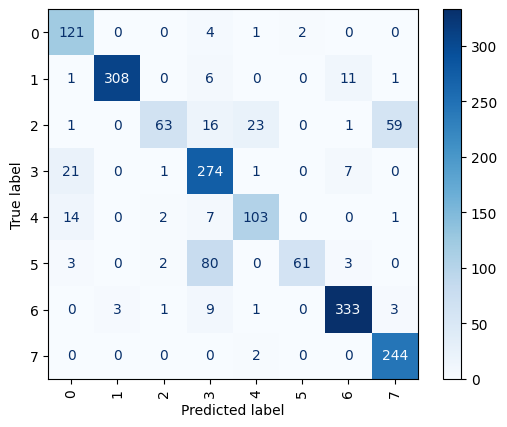

In [26]:
# Evaluate the model
num_class = 8
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val_noisy, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")

# Get predictions and convert them to class labels
y_pred = model.predict(X_val_noisy)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(num_class))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()

#### Normal validation data

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.9887 - loss: 0.1415 - precision: 0.9892 - recall: 0.9887
Validation Loss: 0.1400
Validation Accuracy: 0.9894
Validation Precision: 0.9900
Validation Recall: 0.9894
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step

Classification Report:
              precision    recall  f1-score   support

           0     0.9846    1.0000    0.9922       128
           1     1.0000    0.9939    0.9969       327
           2     0.9939    1.0000    0.9969       163
           3     0.9770    0.9770    0.9770       304
           4     0.9845    1.0000    0.9922       127
           5     0.9733    0.9799    0.9766       149
           6     0.9913    0.9800    0.9856       350
           7     1.0000    1.0000    1.0000       246

    accuracy                         0.9894      1794
   macro avg     0.9881    0.9913    0.9897      1794
weighted avg     0.9894    0.9894    0.9894      1794



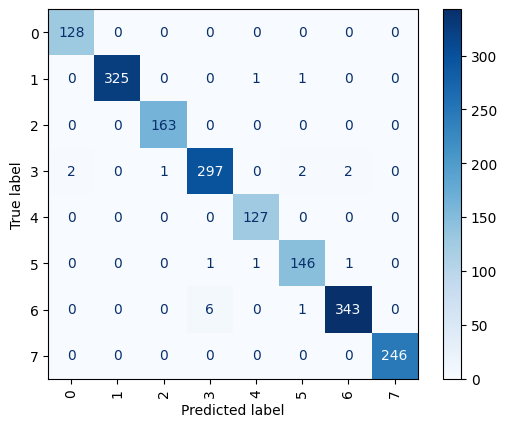

In [27]:
# Evaluate the model
val_loss, val_accuracy, val_precision, val_recall = model.evaluate(X_val, y_val)
print(f"Validation Loss: {val_loss:.4f}")
print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation Precision: {val_precision:.4f}")
print(f"Validation Recall: {val_recall:.4f}")

# Get predictions and convert them to class labels
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_val, axis=1)

# Print precision, recall, and F1-score
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, digits=4))

# Plot confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(num_class))
disp.plot(cmap='Blues', xticks_rotation='vertical')
plt.show()